In [1]:
%load_ext autoreload
%autoreload 2

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import sys
sys.path.append('../')
import gp

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
import cPickle as pickle
import os

In [3]:
# load CREMI B
input_image = []
input_prob = []
input_gold = []
input_rhoana = []
test_slices = range(25,30)# + range(25+20,50) + range(50+20,75)
for z in test_slices:
    image, prob, gold, rhoana = gp.Util.read_cremi_section(os.path.expanduser('~/data/CREMIGP/TEST/'), z)
    input_image.append(image)
    input_prob.append(255.-prob)
    input_gold.append(gold)
    input_rhoana.append(rhoana)    

original_mean_VI, original_median_VI, original_VI_s = gp.Legacy.VI(input_gold, input_rhoana)


In [4]:
best_vis = []
for z in range(len(input_rhoana)):
    fixed = gp.Util.propagate_max_overlap(input_rhoana[z], input_gold[z])
    fixed = gp.Util.relabel(fixed)
    best_vis.append(gp.Util.vi(fixed.astype(np.uint64),input_gold[z].astype(np.uint64)))

In [5]:
original_median_VI

1.6303133330268071

In [6]:
best_vi = np.median(best_vis)
print best_vi

1.2940966349


No. users 1
Avg. correction time 0.0
Avg. corrections 3073.0
Avg. accepted 1111.0


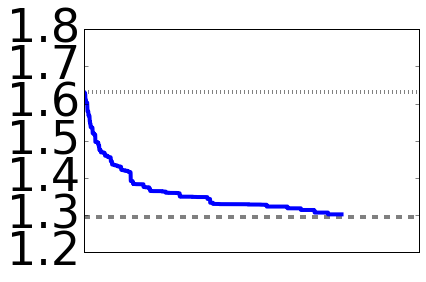

In [9]:
A_simuser_gp_vi_per_slice, A_simuser_gp_merge_vis, A_simuser_gp_split_vis,A_gp_simuser_allvis = gp.Stats.analyze_users(['B_simuserGP'], 
                                                                                         input_gold, input_rhoana,
                                                                                         filename='/home/d/PAPERGFX/B_gpsimuser.pdf',
                                                                                         DATADIR='/home/d/CREMISTUDY/',
                                                                                         data='cremiB',
                                                                                         clampX=4000, clampY=1,
                                                                                                                       hideYlabels=False,
                                                                                         skipoutput=False)

No. users 1
Avg. correction time 0.0
Avg. corrections 1581.0
Avg. accepted 1581.0


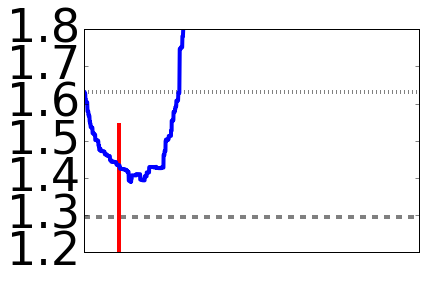

In [10]:
A_auto_gp_vi_per_slice, A_auto_gp_merge_vis, A_auto_gp_split_vis,A_gp_auto_allvis = gp.Stats.analyze_users(['B_autoGP'], 
                                                                                         input_gold, input_rhoana,
                                                                                         filename='/home/d/PAPERGFX/B_gpauto.pdf',
                                                                                         DATADIR='/home/d/CREMISTUDY/',
                                                                                         data='cremiB',
                                                                                                           hline=415,
                                                                                         clampX=4000, clampY=1,
                                                                                                                       hideYlabels=False,
                                                                                         skipoutput=False)

No. users 1
Avg. correction time 0.0
Avg. corrections 1959.0
Avg. accepted 517.0


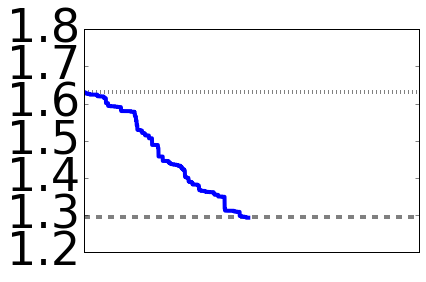

In [11]:
A_simuser_fp_vi_per_slice, A_simuser_fp_merge_vis, A_simuser_fp_split_vis,A_fp_simuser_allvis = gp.Stats.analyze_users(['B_simuserFP'], 
                                                                                         input_gold, input_rhoana,
                                                                                         filename='/home/d/PAPERGFX/B_fpsimuser.pdf',
                                                                                         DATADIR='/home/d/CREMISTUDY/',
                                                                                         data='cremiB',
                                                                                         clampX=4000, clampY=1,
                                                                                                                       hideYlabels=False,
                                                                                         skipoutput=False)

No. users 1
Avg. correction time 0.0
Avg. corrections 1870.0
Avg. accepted 1870.0


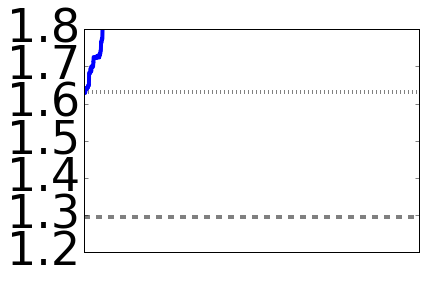

In [12]:
A_auto_fp_vi_per_slice, A_auto_fp_merge_vis, A_auto_fp_split_vis,A_fp_auto_allvis = gp.Stats.analyze_users(['B_autoFP'], 
                                                                                         input_gold, input_rhoana,
                                                                                         filename='/home/d/PAPERGFX/B_fpauto.pdf',
                                                                                         DATADIR='/home/d/CREMISTUDY/',
                                                                                         data='cremiB',
#                                                                                                            hline=448,
                                                                                         clampX=4000, clampY=1,
                                                                                                                       hideYlabels=False,
                                                                                         skipoutput=False)

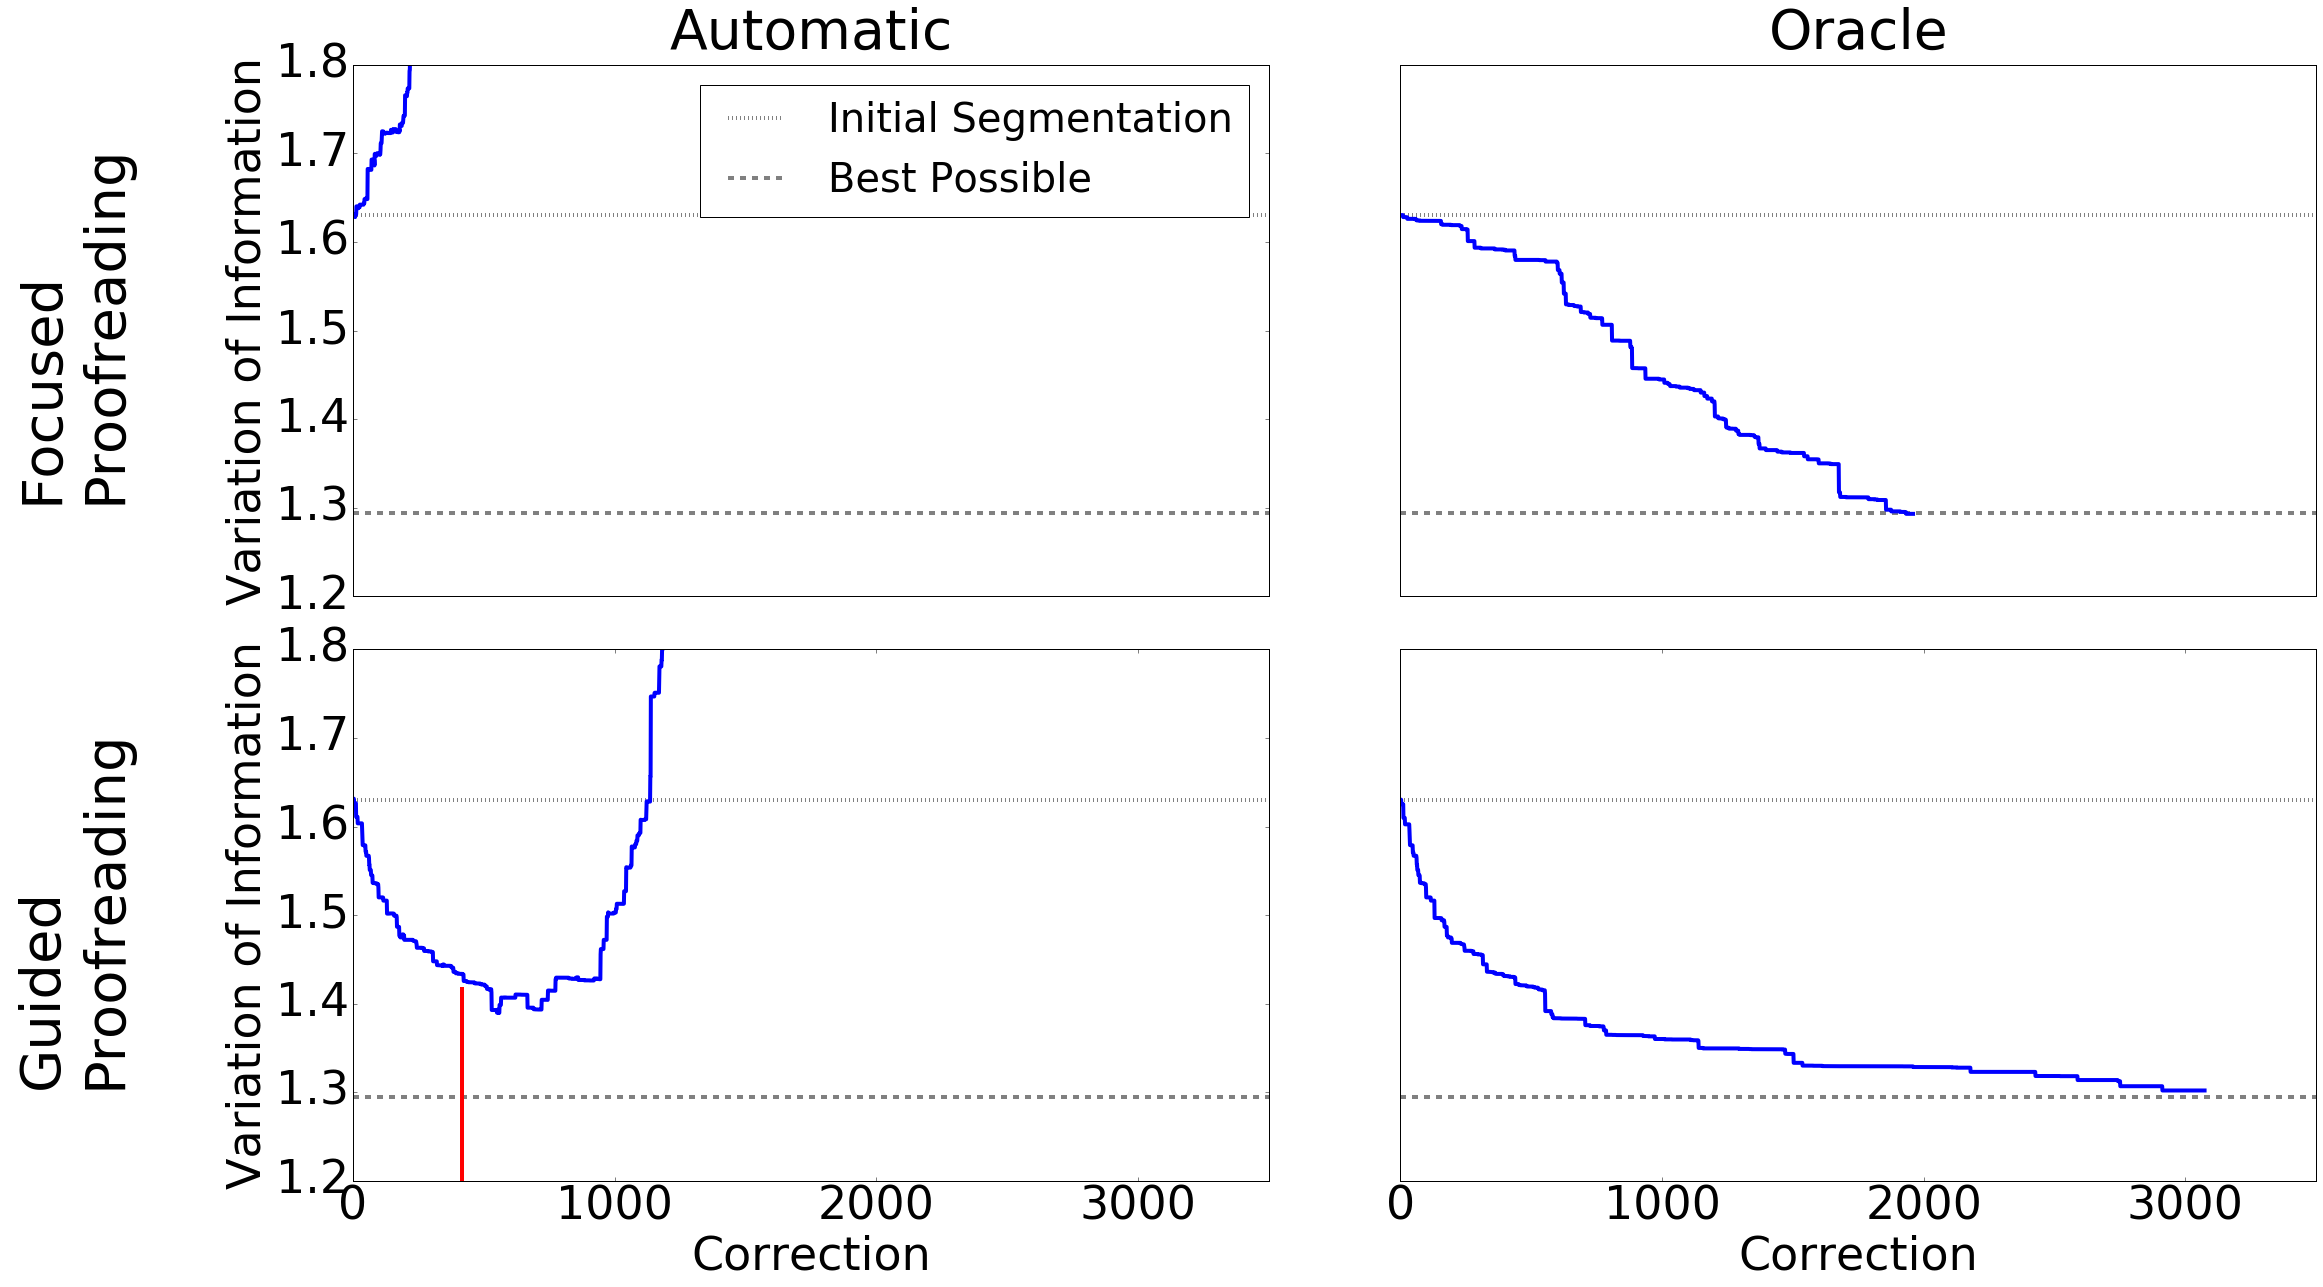

In [18]:
import matplotlib.gridspec as gridspec
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
fig = plt.figure(1, figsize=(40,20))
clamper=3500

c_gold = input_gold
c_rhoana = input_rhoana

# fig.suptitle('Focused Proofreading', y=1.05, fontsize=64, fontweight='bold')
gs = gridspec.GridSpec(2,3,width_ratios=[.15,1,1])
gs.update(wspace=0.2, hspace=0.1)
a = plt.subplot(gs[0])
a.axis('off')
plt.text(-.5, .85, 
         'Focused\nProofreading', 
         ha='left', va='top', rotation='90',
         fontsize=56, fontweight='normal')

plt.subplot(gs[1])
gp.Stats.analyze_users(['B_autoFP'], c_gold, c_rhoana, returnplt=True, vilabel=True, hideYlabels=False, showlegend=True,clampX=clamper,
                       DATADIR='/home/d/CREMISTUDY/',data='cremiB')
plt.title('Automatic', y=1.02)
plt.subplot(gs[2])
gp.Stats.analyze_users(['B_simuserFP'], c_gold, c_rhoana, returnplt=True,clampX=clamper,DATADIR='/home/d/CREMISTUDY/',data='cremiB')
plt.title('Oracle', y=1.02)
a = plt.subplot(gs[3])
a.axis('off')
plt.text(-.5, .85, 
         'Guided\nProofreading', 
         ha='left', va='top', rotation='90',
         fontsize=56, fontweight='normal')
plt.subplot(gs[4])

gp.Stats.analyze_users(['B_autoGP'], c_gold, c_rhoana, hline=415,returnplt=True, vilabel=True,
                       clampX=clamper,hideYlabels=False,clabel=True,hideXlabels=False,DATADIR='/home/d/CREMISTUDY/',data='cremiB')
plt.subplot(gs[5])
gp.Stats.analyze_users(['B_simuserGP'], c_gold, c_rhoana, returnplt=True,clampX=clamper,hideXlabels=False,clabel=True,data='cremiB',
                      DATADIR='/home/d/CREMISTUDY/')

# plt.tight_layout(pad=0.01, w_pad=0.01, h_pad=.5)

# gp.Stats.analyze_users(GP_USERS, gold, rhoana, clampX=700,
#                                                                     filename='/home/d/PAPERGFX/gpusers.pdf')
# plt.subplot(212)
# gp.Stats.analyze_users(GP_USERS, gold, rhoana, clampX=700,
#                                                                     filename='/home/d/PAPERGFX/gpusers.pdf')

plt.savefig('/home/d/PAPERGFX/cremiBtrails.pdf')

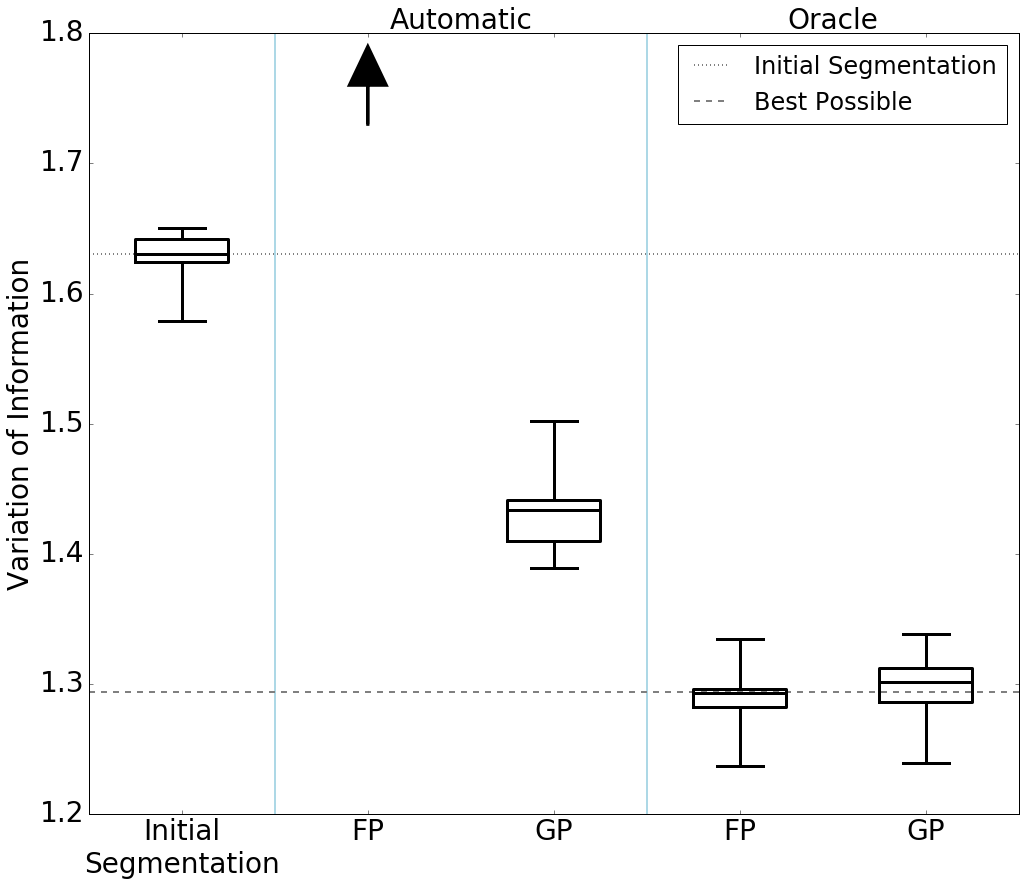

In [27]:
def bigboxplot(objects, data, clampY=True, filename=None):
#     plt.subplots()

    y_pos = range(1,len(objects)+1)

    fig = plt.figure(figsize=(20,14))
    ax = plt.gca()
    ax.axvline(x=1.5,ymax=1, color='lightblue', linewidth=2)
    ax.axvline(x=3.5,ymax=1, color='lightblue', linewidth=2)    
    ax.axvline(x=6.5,ymax=1, color='lightblue', linewidth=2)    
    ax.axvline(x=8.5,ymax=1, color='lightblue', linewidth=2)    
    plt.axhline(np.median(data[0]), color='gray', linewidth=2, linestyle=':', label='Initial Segmentation')
    plt.axhline(y=best_vi, color='gray', linestyle='--', linewidth=2, label='Best Possible')

    bp = plt.boxplot(data, whis=10)
    plt.setp(bp['whiskers'],linewidth=3,linestyle='-',color='black')
    plt.setp(bp['fliers'],linewidth=3)
    plt.setp(bp['means'],linewidth=3)
    plt.setp(bp['medians'],linewidth=3
            ,color='black')
    plt.setp(bp['boxes'],linewidth=3,color='black')
    plt.setp(bp['caps'],linewidth=3)

    plt.text(2.5, 1.82, 
             'Automatic', 
             ha='center', va='top',
             fontsize=28, fontweight='normal')    
#     plt.text(5, .75, 
#              'F. Choice Novice', 
#              ha='center', va='top',
#              fontsize=28, fontweight='normal')   
    
#     plt.text(7.5, .75, 
#              'F. Choice Expert', 
#              ha='center', va='top',
#              fontsize=28, fontweight='normal')   
    

    plt.text(4.5, 1.82, 
             'Oracle', 
             ha='center', va='top',
             fontsize=28, fontweight='normal')    
    
    ax.set_aspect(7)
    ax.arrow(2, 1.73, 0, .03, head_width=0.2, head_length=0.03, fc='k', ec='k', linewidth=3)
    legend = ax.legend(loc='upper right')
    plt.ylabel('Variation of Information')
    if clampY:
        plt.ylim([1.2,1.8])
#     plt.yticks(np.arange(min(x), max(x)+1, 1.0))
    font = {'family' : 'sans-serif',
            'weight' : 'normal',
            'size'   : 28}

    plt.rc('font', **font)
    plt.rc('legend',**{'fontsize':24})
    plt.xticks(y_pos, objects)
    plt.yticks(np.arange(1.2, 1.8, 0.1))
    if filename:
        plt.savefig(filename)
        
    plt.savefig('/home/d/PAPERGFX/cremiBboxplot.pdf')
    plt.show()

objects = ['Initial\nSegmentation',
           'Focused\nProofreading',
           'Guided\nProofreading',        
           'Focused\nProofreading',
           'Guided\nProofreading']
objects = ['Initial\nSegmentation',
           'FP',
           'GP',           
           'FP',
           'GP']

data = [original_VI_s, 
        [], 
        A_gp_auto_allvis[0][415], 
        A_simuser_fp_split_vis[-1],
        A_gp_simuser_allvis[0][-1]]
bigboxplot(objects, data)

In [34]:
A=A_gp_auto_allvis[0][415]
print np.median(A), np.std(A)

1.43360058901 0.0383550555455


In [29]:
A=A_gp_simuser_allvis[0][-1]
print np.median(A), np.std(A)

1.30196894575 0.032891365136


In [30]:
A=A_simuser_fp_split_vis[-1]
print np.median(A), np.std(A)

1.29301423626 0.0311559458495


In [35]:
A=A_auto_fp_split_vis[-1]
print np.median(A), np.std(A)
4.25445915084/1.43360058901

4.25445915084 0.0722766704616


2.967673969622178

In [33]:
original_median_VI

1.6303133330268071

In [36]:
np.std(original_VI_s)

0.024910550104186087